# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

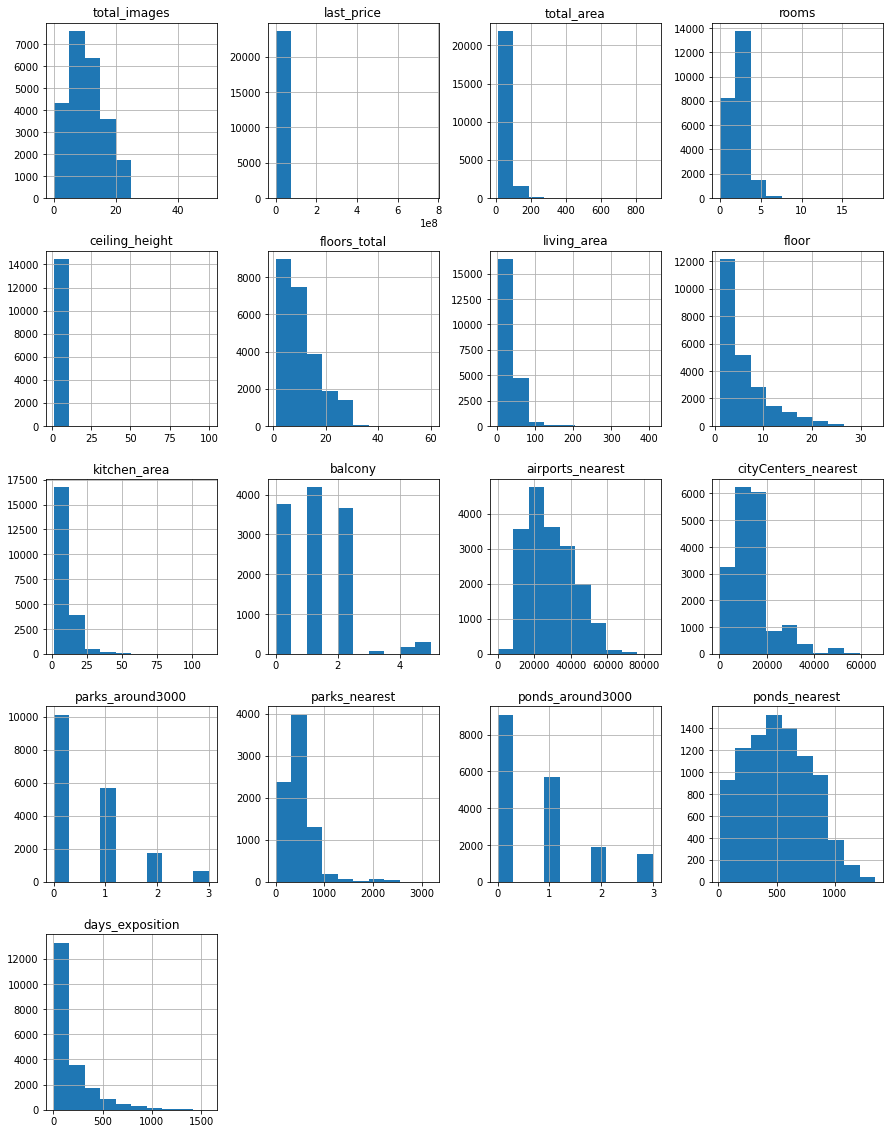

In [6]:
data.hist(figsize=(15, 20));

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

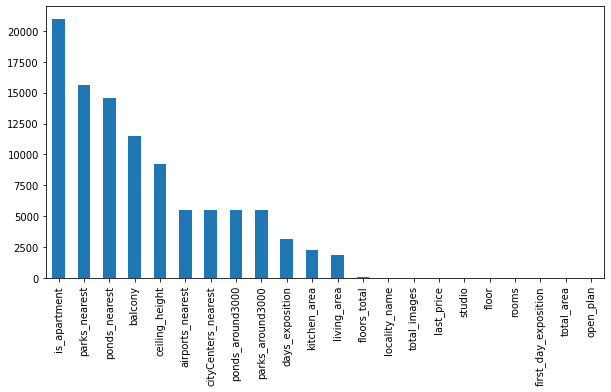

In [10]:
data.isna().sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5));

#### Вывод
* Пропуски есть в половине столбцов
* Наибольшее количество пропусков наблюдается в столбце 'is_apartment', > 20.000 пропущенных значений
* Имеются выбросы

### Предобработка данных

Начнём обработку пропусков с наибольших значений по типам данных, добавленными пользователями

In [11]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

* Предположим, что люди, у которых недвижимость представлена апартаментами, знают об этом и указывают в объявлении. 
* Остальные возможно не знакомы с данным типом недвижимости, поэтому пропускают данный пункт в описании. 
*  Предположим, что апартаменты не являются популярным типом недвижимости в Санкт-Петербурге, и заполним пропуски на False

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [14]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [15]:
data['balcony'].isna().sum()

11519

Пропущенные значение в пункте "Балконы" скорее всего свидетельствует о том, что в данных квартирах их нет, либо они являются лождиями, заменим значения на 0 и приведём данные к числовому типу.

In [16]:
data['balcony'] = data['balcony'].fillna(0)

In [17]:
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [18]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [19]:
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
3474       8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64

In [20]:
data[data['ceiling_height']>6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,False,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Предположим, что некоторые люди забыли разделить числа запятой, например высота потолка не 27 м, а 27. Посчитаем медианное значение и заполним им такие показатели, где высота потолка составляет более 10 м, а также пропущенные значения.

In [21]:
data['ceiling_height'].median()

2.65

In [22]:
data.loc[data['ceiling_height']>10, 'ceiling_height'] = 2.65

In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [24]:
data['ceiling_height'].isna().sum()

0

In [25]:
data['living_area'].median() * 100 // data['total_area'].median()

57.0

In [26]:
round(data['kitchen_area'].median() / data['total_area'].median() * 100)

18

In [27]:
100 - round((data['living_area'].median() + data['kitchen_area'].median())/
      data['total_area'].median() * 100)

25

#### Вывод:
* В среднем жилая площадь занимает 57% 
* В среднем площадь кухни заниамет 18%
* В среднем нежилая площадь (гардероб, санитарные узлы, различные помещения) занимает 25%

Заполним пропуски до данным категориям

In [28]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.57)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.18)

In [29]:
print(data['living_area'].isna().sum())
print(data['kitchen_area'].isna().sum())

0
0


Приведём столбец first_day_exposition к читабельному виду. Оставим только год, месяц и день, так как часы, минуты и секунды нам не важны.

In [30]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT')

In [31]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

 Предположим, что объявления с пропущенными значениями в столбце days_exposition являются актуальными и оставим их без именений. 

### Посчитайте и добавьте в таблицу новые столбцы

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах

In [32]:
data['price_for_meter'] = data['last_price'] // data['total_area']

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


In [34]:
data['pub_day'] = data['first_day_exposition'].dt.weekday
data['pub_month'] = data['first_day_exposition'].dt.month
data['pub_year'] = data['first_day_exposition'].dt.year

In [35]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,pub_day,pub_month,pub_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


In [36]:
data.loc[data['floor']==1, 'floor_type'] = 'первый'
data.loc[data['floor']==data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor_type'].isna(), 'floor_type'] = 'другой'

In [37]:
data['floor_type'].value_counts()

другой       17446
последний     3361
первый        2892
Name: floor_type, dtype: int64

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,pub_day,pub_month,pub_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.0,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой


In [39]:
data['cityCenters_nearest'].head()

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
Name: cityCenters_nearest, dtype: float64

In [40]:
data['km_to_center'] = data['cityCenters_nearest'] // 1000

In [41]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,pub_day,pub_month,pub_year,floor_type,km_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.0,1,12,2018,первый,18.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.0,3,8,2015,другой,13.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,...,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой,6.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

Построим гистограммы, чтобы изучить количество комнат, площадь квартир, высоту потолков и цены

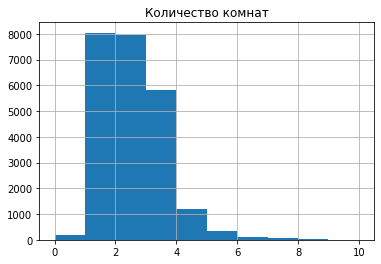

In [45]:
plt.title('Количество комнат')
data['rooms'].hist(bins=10, range=(0, 10))
plt.show()

Делаем вывод, что больше всего объявлений квартир с 1-3 комнатами.

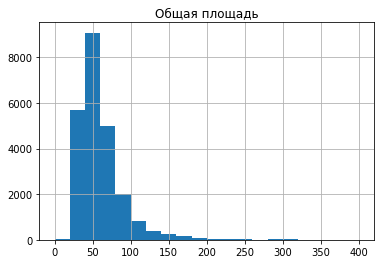

In [43]:
plt.title('Общая площадь')
data['total_area'].hist(bins=20, range=(0, 400))
plt.show()

Наибольшее количество объвлений с общей площадью 50 кв.м.

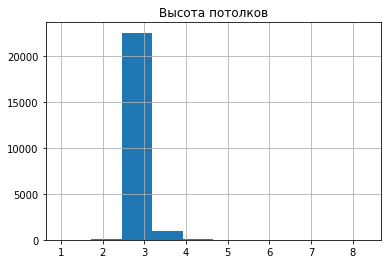

In [46]:
plt.title('Высота потолков')
data['ceiling_height'].hist()
plt.show()

Высота потолков в основном составляет 2.5 - 3.2 метра.

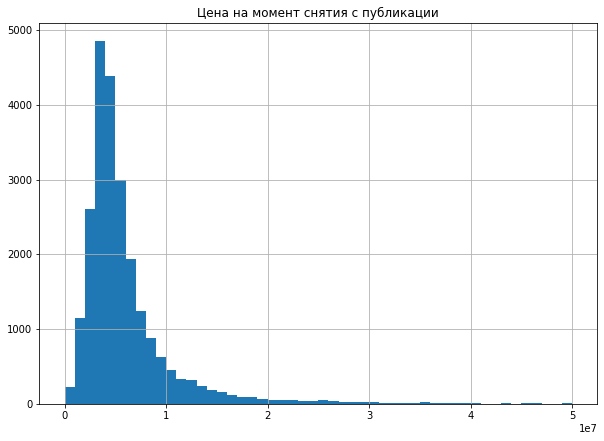

In [48]:
plt.title('Цена на момент снятия с публикации')
data['last_price'].hist(bins=50, range=(0, 50000000), figsize=(10, 7))
plt.show()

Сделать однозначные выводы по такому графику будет нелучшим решением, разобьём цены квартир на категории. 

In [45]:
def category_price(row):
    price = row['last_price']
    if price < 1000000:
        return 'до 1 млн'
    if 1000000 <= price < 2000000:
        return 'от 1 до 2 млн'
    if 2000000 <= price < 3000000:
        return 'от 2 до 3 млн'
    if 3000000 <= price < 4000000:
        return 'от 3 до 4 млн'
    if 4000000 <= price < 5000000:
        return 'от 4 до 5 млн'
    if 5000000 <= price < 6000000:
        return 'от 5 до 6 млн'
    if 6000000 <= price < 7000000:
        return 'от 6 до 7 млн'
    if 7000000 <= price < 8000000:
        return 'от 7 до 8 млн'
    if 8000000 <= price < 9000000:
        return 'от 8 до 9 млн'
    if 9000000 <= price <= 10000000:
        return 'от 9 до 10 млн'
    if price > 10000000:
        return 'больше 10 млн'

In [46]:
data['category_price'] = data.apply(category_price, axis=1)

In [47]:
data.groupby('category_price')['last_price'].count().sort_values(ascending=False)

category_price
от 3 до 4 млн     4850
от 4 до 5 млн     4392
от 5 до 6 млн     2993
больше 10 млн     2721
от 2 до 3 млн     2611
от 6 до 7 млн     1933
от 7 до 8 млн     1248
от 1 до 2 млн     1149
от 8 до 9 млн      886
от 9 до 10 млн     691
до 1 млн           225
Name: last_price, dtype: int64

In [48]:
data.pivot_table(
    index='category_price',
    values='last_price', 
    aggfunc='count').sort_values(by='last_price', ascending=False)

,last_price
category_price,
от 3 до 4 млн,4850
от 4 до 5 млн,4392
от 5 до 6 млн,2993
больше 10 млн,2721
от 2 до 3 млн,2611
от 6 до 7 млн,1933
от 7 до 8 млн,1248
от 1 до 2 млн,1149
от 8 до 9 млн,886


Делаем вывод, что самые популярные квартиры продаются от 3 до 4 млн рублей и от 4 до 5 млн. 

In [49]:
data['living_area'].median()

30.0

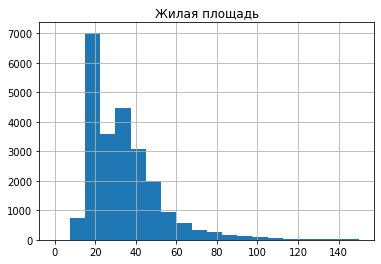

In [49]:
plt.title('Жилая площадь')
data['living_area'].hist(bins=20, range=(0, 150))
plt.show()

Наибольшее количество объявлений с жилой площадью квартир от 15 до 50 кв.м.

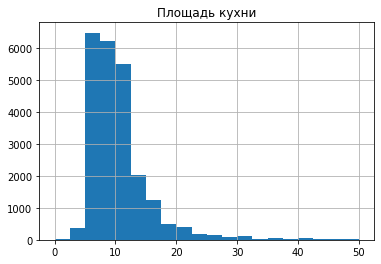

In [50]:
plt.title('Площадь кухни')
data['kitchen_area'].hist(bins=20, range=(0, 50))
plt.show()

Наибольшее количество объявлений с площадью кухни от 5 до 15 кв.м.

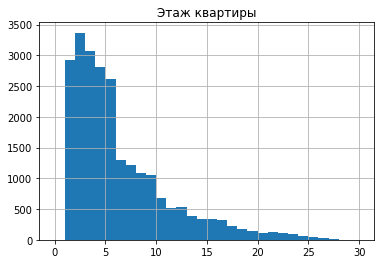

In [51]:
plt.title('Этаж квартиры')
data['floor'].hist(bins=30, range=(0, 30))
plt.show()

 Большинство квартир в объявлениях находятся в пределах 1-6 этажей

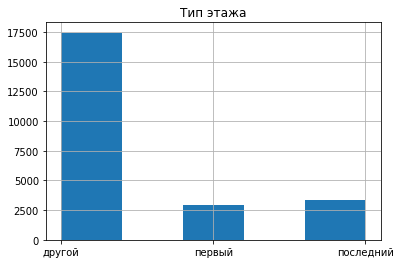

In [52]:
plt.title('Тип этажа')
data['floor_type'].hist(bins=5)
plt.show()

Как видим, этажи со 2 по 6 являются самыми популярными

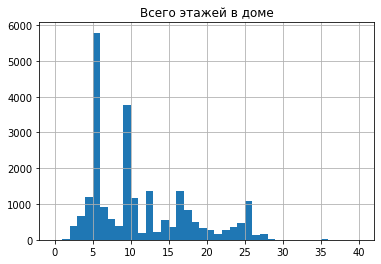

In [54]:
plt.title('Всего этажей в доме')
data['floors_total'].hist(bins=40, range=(0, 40))
plt.show()

Большинство квартир находится в 5- и 9-этажных домах

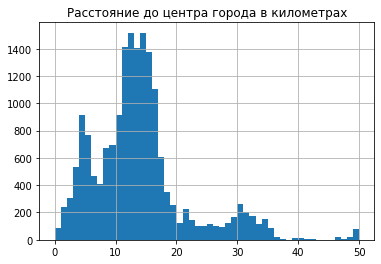

In [55]:
plt.title('Расстояние до центра города в километрах')
data['km_to_center'].hist(bins=50, range=(0, 50))
plt.show()

Большинство квартир находится в пределах 10-18 км от центра города

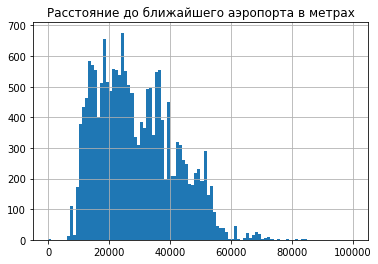

In [56]:
plt.title('Расстояние до ближайшего аэропорта в метрах')
data['airports_nearest'].hist(bins=100, range=(0, 100000))
plt.show()

Большая часть квартир находится в 10-40 км от ближайшего аэропорта

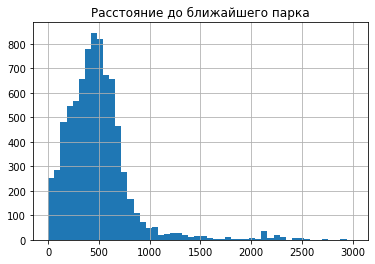

In [57]:
plt.title('Расстояние до ближайшего парка')
data['parks_nearest'].hist(bins=50, range=(0, 3000))
plt.show()

Большинство квартир находится в пределах 200-700 метров от ближайшего парка

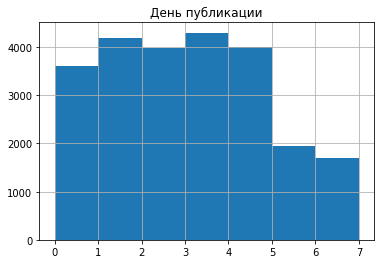

In [58]:
plt.title('День публикации')
data['pub_day'].hist(bins=7, range=(0, 7))
plt.show()

Большая часть людей выкладывает объявления в будние дни, а именно, в четверг, на выходных тенденция заметно уменьшается. 

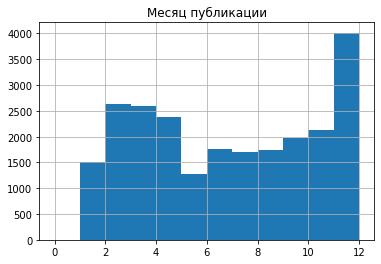

In [59]:
plt.title('Месяц публикации')
data['pub_month'].hist(bins=12, range=(0, 12))
plt.show()

 Большая часть объявлений приходится на декабрь

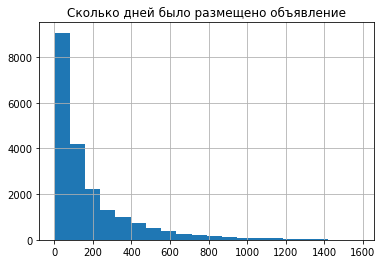

In [60]:
plt.title('Сколько дней было размещено объявление')
data['days_exposition'].hist(bins=20)
plt.show()

* Большая часть квартир продаётся в пределах 100 дней
* Рассмотрим взаимосвязь времени продажи и цены

In [61]:
data.pivot_table(index='category_price', 
                 values='days_exposition', 
                 aggfunc=['count','median','mean'])

,count,median,mean
,days_exposition,days_exposition,days_exposition
category_price,,,
больше 10 млн,2042,156.0,271.621939
до 1 млн,180,82.0,155.888889
от 1 до 2 млн,946,96.5,175.702960
от 2 до 3 млн,2354,86.5,162.522940
от 3 до 4 млн,4489,80.0,158.291602
от 4 до 5 млн,3950,86.5,160.713924
от 5 до 6 млн,2573,95.0,182.912942
от 6 до 7 млн,1665,98.0,182.284084


Наиболее быстро продаются квартиры стоимостью от 3 до 4 млн рублей. Однако среднее значение сильно отличается от медианного, значит, есть квартиры, которые долго простаиваются. 

In [62]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Быстрые продажи совершаются в пределах 45 дней, необычно долгие - свыше 230 дней

###### Вывод:
* Больше всего объявлений приходится на квартиры с 1-3 комнатами
* Наибольшее количество объвлений с общей площадью 50 кв.м.
* Высота потолков в основном составляет 2.5 - 3.2 метра.
* Cамые популярные квартиры продаются от 3 до 4 млн рублей и от 4 до 5 млн.
* Этажи со 2 по 6 являются самыми популярными
* Большинство квартир находится в 5ти и 9тиэтажных домах
* Большинство квартир находится в пределах 10-18 км от центра города
* Большая часть квартир находится в 10-40 км от ближайшего аэропорта
* Большинство квартир находится в пределах 200-700 метров от ближайшего парка
* Большая часть людей выкладывает объявления в будние дни, а именно, в четверг, на выходных тенденция заметно уменьшается
* Большая часть объявлений приходится на декабрь
* Большая часть квартир продаётся в пределах 100 дней
* Наиболее быстро продаются квартиры стоимостью от 3 до 4 млн рублей. Однако среднее значение сильно отличается от медианного, значит, есть квартиры, которые долго простаиваются.
* Быстрые продажи совершаются в пределах 45 дней, необычно долгие - свыше 230 дней

### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.
#### Как зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

 Для удобства создадим датафрейм только с нужными категориями. 

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [64]:
new_data = data[['total_area', 'living_area', 'kitchen_area', 'rooms', 
                 'floor', 'floor_type', 'pub_day', 'pub_month', 'pub_year',
                'last_price', 'category_price']]

In [65]:
new_data.head()

,total_area,living_area,kitchen_area,rooms,floor,floor_type,pub_day,pub_month,pub_year,last_price,category_price
0,108.0,51.00,25.00,3,8,другой,3,3,2019,13000000.0,больше 10 млн
1,40.4,18.60,11.00,1,1,первый,1,12,2018,3350000.0,от 3 до 4 млн
2,56.0,34.30,8.30,2,4,другой,3,8,2015,5196000.0,от 5 до 6 млн
3,159.0,90.63,28.62,3,9,другой,4,7,2015,64900000.0,больше 10 млн
4,100.0,32.00,41.00,2,13,другой,1,6,2018,10000000.0,от 9 до 10 млн


In [66]:
new_data.corr().sort_values(by='last_price', ascending=False)

,total_area,living_area,kitchen_area,rooms,floor,pub_day,pub_month,pub_year,last_price
last_price,0.653675,0.585768,0.515245,0.363343,0.026576,0.001550,0.002779,-0.043089,1.000000
total_area,1.000000,0.946045,0.661387,0.758344,-0.024754,-0.004695,0.004920,-0.079912,0.653675
living_area,0.946045,1.000000,0.504216,0.827270,-0.089422,-0.004000,-0.000436,-0.072256,0.585768
kitchen_area,0.661387,0.504216,1.000000,0.326828,0.106153,-0.004714,0.003198,-0.059601,0.515245
rooms,0.758344,0.827270,0.326828,1.000000,-0.150862,-0.004134,-0.004469,-0.055418,0.363343
floor,-0.024754,-0.089422,0.106153,-0.150862,1.000000,0.012347,0.019387,0.004915,0.026576
pub_month,0.004920,-0.000436,0.003198,-0.004469,0.019387,0.011496,1.000000,-0.269642,0.002779
pub_day,-0.004695,-0.004000,-0.004714,-0.004134,0.012347,1.000000,0.011496,-0.004799,0.001550
pub_year,-0.079912,-0.072256,-0.059601,-0.055418,0.004915,-0.004799,-0.269642,1.000000,-0.043089


###### Вывод:
* Наибольшая зависимость наблюдается между ценой квартиры и её общей площадью - 65%
* Далее идёт жилая площадь - 58%
* Площадь кухни - 51%

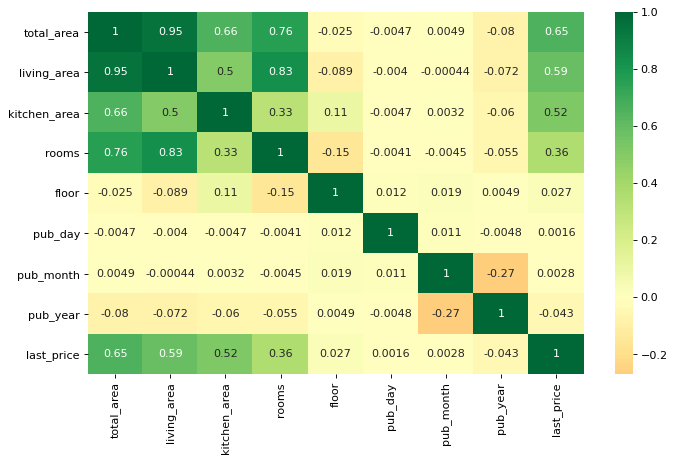

In [67]:
plt.figure(figsize=(10,6), dpi= 80)
sns.heatmap(new_data.corr(), xticklabels=new_data.corr().columns,
            yticklabels=new_data.corr().columns, cmap='RdYlGn', center=0, annot=True);

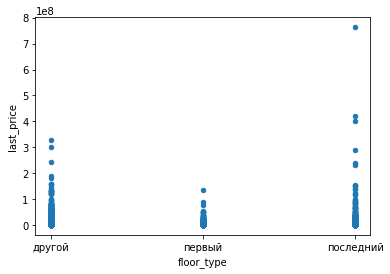

In [61]:
data.plot(x='floor_type', y='last_price', kind='scatter');

In [62]:
data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean'])

,median,mean
,last_price,last_price
floor_type,,
другой,4850000.0,6.675444e+06
первый,3900000.0,4.820982e+06
последний,4300000.0,7.327011e+06


###### Вывод:
В среднем квартиры на первом этаже стоят дешевле других. 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Проверим наличие дубликатов и посмотрим на список уникальных значений

In [63]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [64]:
data['locality_name'].duplicated().sum()

23334

Для удобства создадим отдельный список с нужными населёнными пунктами

In [65]:
ten_locations = data.pivot_table(index='locality_name', values='price_for_meter', 
                 aggfunc=['count', 'median', 'mean'])
ten_locations.columns = ('count', 'median', 'mean')
ten_locations = ten_locations.sort_values(by='count', ascending=False).head(10)

In [66]:
ten_locations

,count,median,mean
locality_name,,,
Санкт-Петербург,15721,104761.0,114848.560015
посёлок Мурино,522,85878.0,85751.729885
посёлок Шушары,440,76876.0,78676.902273
Всеволожск,398,65789.0,68654.007538
Пушкин,369,100000.0,103125.368564
Колпино,338,74723.5,75424.147929
посёлок Парголово,327,91642.0,90175.486239
Гатчина,307,67796.0,68745.693811
деревня Кудрово,299,91860.0,92473.076923


###### Вывод:
* Наибольшее количество объявлений в Санкт-Петербурге
* Наименьшее в Выборге

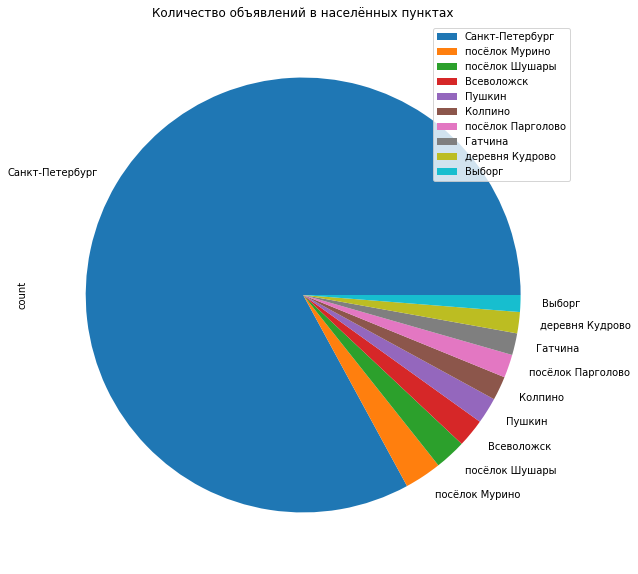

In [97]:
ten_locations.plot(y='count', kind='pie', figsize=(10, 10)).set_title(
    'Количество объявлений в населённых пунктах');

In [83]:
ten_locations.sort_values(by='median', ascending=False)

,count,median,mean
locality_name,,,
Санкт-Петербург,15721,104761.0,114848.560015
Пушкин,369,100000.0,103125.368564
деревня Кудрово,299,91860.0,92473.076923
посёлок Парголово,327,91642.0,90175.486239
посёлок Мурино,522,85878.0,85751.729885
посёлок Шушары,440,76876.0,78676.902273
Колпино,338,74723.5,75424.147929
Гатчина,307,67796.0,68745.693811
Всеволожск,398,65789.0,68654.007538


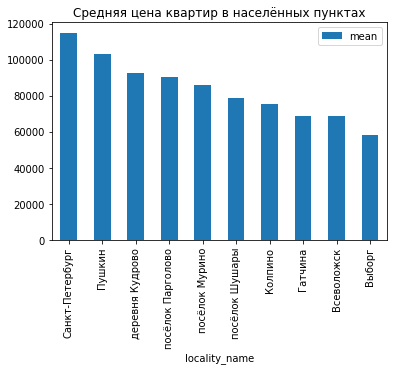

In [84]:
ten_locations.sort_values(by='median', ascending=False).plot(y='mean', kind='bar').set_title(
    'Средняя цена квартир в населённых пунктах');

* Самые дорогие квартиры по цене за квадратный метр так же находятся в Санкт-Петербурге
* За ним с небольшой разницей идёт город Пушкин
* На последнем месте так же находится Выборг

In [75]:
st_peter = data.query('locality_name == "Санкт-Петербург"')

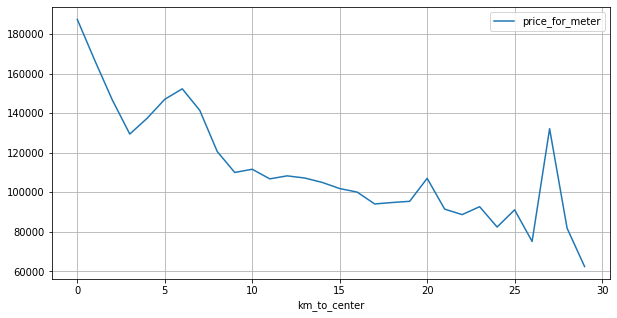

In [76]:
st_peter.pivot_table(index='km_to_center', values='price_for_meter').plot(figsize=(10, 5), 
                                                                          grid=True);

В среднем, чем дальше квартира находится от центра, тем ниже стоимость её квадратного метра, следовательно, ниже и цена самой квартиры. 

In [77]:
st_peter_2 = st_peter.query('km_to_center == 2')['price_for_meter'].mean()
st_peter_1 = st_peter.query('km_to_center == 1')['price_for_meter'].mean()
st_peter_0 = st_peter.query('km_to_center == 0')['price_for_meter'].mean()

In [78]:
(st_peter_1 - st_peter_2) + (st_peter_0 - st_peter_1) // 2

30300.898819218244

In [79]:
st_peter_10 = st_peter.query('km_to_center == 10')['price_for_meter'].mean()
st_peter_24 = st_peter.query('km_to_center == 24')['price_for_meter'].mean()

In [80]:
(st_peter_10 - st_peter_24) // 15

1946.0

* В среднем от 0 до 2,5 и от 6 до 9 км от центра Санкт-Петербурга цена за 1 кв.м. по мере удаления от центра города на 1 км будет равна 30300 рублям. 
* В среднем от 10 до 24 км от центра Санкт-Петербурга цена за 1 кв.м. по мере удаления от центра города на 1 км будет равна 1946 рублям. 

###### Вывод:
* Наибольшая зависимость наблюдается между ценой квартиры и её общей площадью - 65%
* Далее идёт жилая площадь - 58%
* Площадь кухни - 51%

* В среднем квартиры на первом этаже стоят дешевле других

* Наибольшее количество объявлений располагается в Санкт-Петербурге
* Наименьшее - в Выборге

* Самые дорогие квартиры по цене за квадратный метр так же находятся в Санкт-Петербурге
* За ним с небольшой разницей идёт город Пушкин
* На последнем месте так же находится Выборг

* В среднем, чем дальше квартира находится от центра, тем ниже стоимость её квадратного метра, следовательно, ниже и цена самой квартиры

* В среднем от 0 до 2,5 и от 6 до 9 км от центра Санкт-Петербурга цена за 1 кв.м. по мере удаления от центра города на 1 км будет равна 30300 рублям.
* В среднем от 10 до 24 км от центра Санкт-Петербурга цена за 1 кв.м. по мере удаления от центра города на 1 км будет равна 1946 рублям.

### Общий вывод

* В среднем жилая площадь занимает 57% от общей площади
* В среднем площадь кухни заниамет 18% от общей площади
* В среднем нежилая площадь (гардероб, санитарные узлы, различные помещения) занимает 25% от общей площади

* Больше всего объявлений приходится на квартиры с 1-3 комнатами

* Наибольшее количество объвлений с общей площадью 50 кв.м.

* Высота потолков в основном составляет 2.5 - 3.2 метра.

* Cамые популярные квартиры продаются от 3 до 4 млн рублей и от 4 до 5 млн.

* Этажи со 2 по 6 являются самыми популярными

* Большинство квартир находится в 5ти и 9тиэтажных домах

* Большинство квартир находится в пределах 10-18 км от центра города

* Большая часть квартир находится в 10-40 км от ближайшего аэропорта

* Большинство квартир находится в пределах 200-700 метров от ближайшего парка

* Большая часть людей выкладывает объявления в будние дни, а именно, в четверг, на выходных тенденция заметно уменьшается

* Большая часть объявлений приходится на декабрь

* Большая часть квартир продаётся в пределах 100 дней

* Наиболее быстро продаются квартиры стоимостью от 3 до 4 млн рублей. Однако среднее значение сильно отличается от медианного, значит, есть квартиры, которые долго простаиваются.

* Быстрые продажи совершаются в пределах 45 дней, необычно долгие - свыше 230 дней

* Наибольшая зависимость наблюдается между ценой квартиры и её общей площадью - 65%
* Далее идёт жилая площадь - 58%
* Площадь кухни - 51%

* В среднем квартиры на первом этаже стоят дешевле других

* Наибольшее количество объявлений располагается в Санкт-Петербурге
* Наименьшее - в Выборге

* Самые дорогие квартиры по цене за квадратный метр так же находятся в Санкт-Петербурге
* За ним с небольшой разницей идёт город Пушкин
* На последнем месте так же находится Выборг

* В среднем, чем дальше квартира находится от центра, тем ниже стоимость её квадратного метра, следовательно, ниже и цена самой квартиры

* В среднем от 0 до 2,5 и от 6 до 9 км от центра Санкт-Петербурга цена за 1 кв.м. по мере удаления от центра города на 1 км будет равна 30300 рублям.
* В среднем от 10 до 24 км от центра Санкт-Петербурга цена за 1 кв.м. по мере удаления от центра города на 1 км будет равна 1946 рублям.